1/1 [==============================] - 1s 1s/step
Predicted:
Egyptian_cat: 0.5891
lynx: 0.2163
Siamese_cat: 0.1589


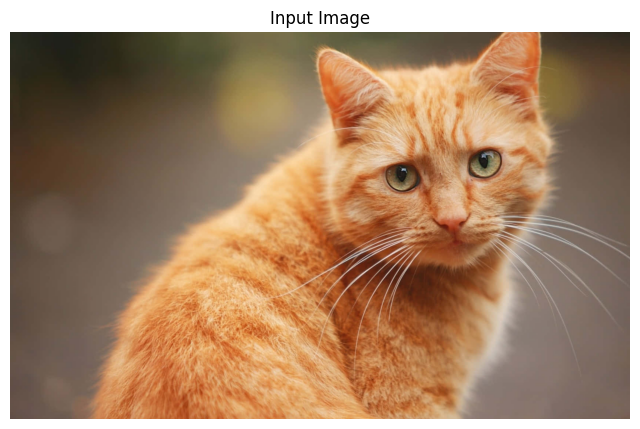

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image

def load_image(img_path):
    """
    Load and preprocess the input image.

    Args:
    - img_path (str): Path to the input image file.

    Returns:
    - np.ndarray: Preprocessed image array ready for ResNet50 input.
    """
    # Load the image using OpenCV
    img = cv2.imread(img_path)

    # Resize the image to 224x224 (input size for ResNet50)
    img = cv2.resize(img, (224, 224))

    # Convert the image to array format suitable for Keras
    x = image.img_to_array(img)

    # Expand the dimensions of the image array to match the expected input format
    x = np.expand_dims(x, axis=0)

    # Preprocess the input by subtracting the mean RGB channels of the ImageNet dataset
    x = preprocess_input(x)

    return x

def predict_image(model, img_path, top=3):
    """
    Predict the top classes of the input image using the specified model.

    Args:
    - model: Keras model object (pre-trained ResNet50 in this case).
    - img_path (str): Path to the input image file.
    - top (int): Number of top predictions to display (default is 3).

    Returns:
    - list: List of tuples (class_label, description, probability) for the top predictions.
    """
    # Load and preprocess the image
    x = load_image(img_path)

    # Make predictions using the model
    preds = model.predict(x)

    # Decode the predictions into human-readable labels
    decoded_preds = decode_predictions(preds, top=top)[0]

    return decoded_preds

if __name__ == "__main__":
    # Load the pre-trained ResNet50 model
    model = ResNet50(weights='imagenet')

    # Path to the input image
    img_path = 'cat3.jpg'  # Replace with your image path

    try:
        # Make predictions
        preds = predict_image(model, img_path)

        # Print the top predictions
        print('Predicted:')
        for pred in preds:
            print(f'{pred[1]}: {pred[2]:.4f}')

        # Display the image
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for matplotlib

        plt.figure(figsize=(8, 6))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title('Input Image')
        plt.show()

    except Exception as e:
        print(f"Error: {e}")
